# Tutorial #13: FITS images

Let's repeat some of what we did during lecture with a new image. This time in X-ray

In [2]:
data_url = 'https://heasarc.gsfc.nasa.gov/FTP/swift/data/obs/2025_01/00018938039/xrt/products/sw00018938039xpc_sk.img.gz'

Open the fits file at data_url, and inspect it. 

- How many HDUs are there?
- display the header info
- what telescope and/or instrument took this image?
- How many images are there?
- What is the size of the image(s)?
- What is the exposure time of the image(s) in seconds?

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

f = fits.open('sw00018938039xpc_sk.img')
print(f.info())
print(f"This fits file has {len(f)} HDUs.")
HDU = f[0].header
print(f"This image was taken by the {HDU['TELESCOP']} telescope, using its {HDU['INSTRUME']} instrument.")
print(f"There is 1 image in this HDU.")
print(f"The size of the image is {HDU['NAXIS1']}x{HDU['NAXIS2']} pixels.")
print(f"The exposure time of this image is {HDU['EXPOSURE']} seconds.")
#HDU

Filename: sw00018938039xpc_sk.img
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     445   (1000, 1000)   int32   
  1  GTI           1 BinTableHDU     66   1R x 2C   [1D, 1D]   
  2  SRCLIST       1 BinTableHDU    108   4R x 11C   [1E, 1E, 1E, 1E, 1E, 1D, 1D, 1E, 1E, 1E, 1E]   
None
This fits file has 3 HDUs.
This image was taken by the SWIFT telescope, using its XRT instrument.
There is 1 image in this HDU.
The size of the image is 1000x1000 pixels.
The exposure time of this image is 1565.79440108058 seconds.


Using astropy's WCS module, find the RA and Dec of the pixel with the largest value

In [4]:
from astropy.wcs import WCS

image_data = f[0].data
wcs = WCS(HDU)
#the pixel with the maximum value
#min_value = np.min(image_data)
max_value = np.max(image_data)
max_value_x = np.where(image_data == max_value)[0][0]
max_value_y = np.where(image_data == max_value)[1][0]
print(f"The maximum value in this image is {max_value} at pixel {max_value_x},{max_value_y}.")

sky_coords = wcs.pixel_to_world(max_value_x, max_value_y)
print(f"The maximum pixel occurs at RA = {sky_coords.ra} and DEC = {sky_coords.dec}.")




The maximum value in this image is 30 at pixel 483,524.
The maximum pixel occurs at RA = 182.67018846341506 deg and DEC = 39.43231197990229 deg.


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 60677.049919 from DATE-END'. [astropy.wcs.wcs]


In [5]:
print('number of pixels above 10,000 =',np.sum(image_data > 1e4))
print('number of pixels above 1,000 =',np.sum(image_data > 1e3))
print('number of pixels above 100 =',np.sum(image_data > 1e2))
print('number of pixels above 10 =',np.sum(image_data > 1e1))
print('number of pixels above 1 =',np.sum(image_data > 1e0))
print('number of pixels above 0 =',np.sum(image_data > 0))
print('number of pixels that are 0 =',np.sum(image_data == 0))

#Most pixel are 0 and they don't go above 10

print("total pixels =", image_data.size)

number of pixels above 10,000 = 0
number of pixels above 1,000 = 0
number of pixels above 100 = 0
number of pixels above 10 = 36
number of pixels above 1 = 317
number of pixels above 0 = 1647
number of pixels that are 0 = 998353
total pixels = 1000000


Plot the image with sky coordinates as the axes

- Use a colormap that helps you vizualize the data best
- follow the guide [here](https://docs.astropy.org/en/latest/visualization/wcsaxes/ticks_labels_grid.html#tick-label-format) to change the format of the axis labels, make them in degrees with 2 decimal points ('d.dd')

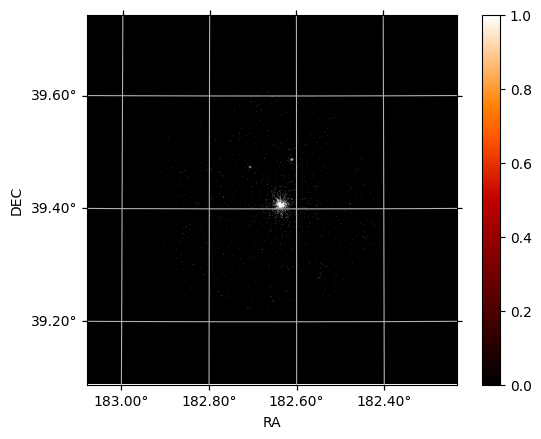

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm


ax = plt.subplot(projection = wcs)

lon = ax.coords[0]
lat = ax.coords[1]

plt.imshow(f[0].data, vmin=0, vmax=1, cmap = cm.gist_heat)
plt.colorbar()
lat.set_major_formatter('d.dd')
lon.set_major_formatter('d.dd')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.grid(True)
plt.show()

Find all the pixels that are well above background 

- Get the indexes where pixels have more than 5 counts
- Get the ra and dec of those indexes
- Find the max and min values of those ra's and dec's

In [ ]:
# Get the indexes where pixels have more than 5 counts
above_background_indices = np.argwhere(image_data > 5)

# Convert pixel indices to RA and Dec
sky_coords_above_background = wcs.pixel_to_world(above_background_indices[:, 1], above_background_indices[:, 0])

# Find the max and min values of RA and Dec
max_ra = np.max(sky_coords_above_background.ra.deg)
min_ra = np.min(sky_coords_above_background.ra.deg)
max_dec = np.max(sky_coords_above_background.dec.deg)
min_dec = np.min(sky_coords_above_background.dec.deg)

print(f"Max RA: {max_ra}, Min RA: {min_ra}")
print(f"Max Dec: {max_dec}, Min Dec: {min_dec}")


Max RA: 182.64306438206137, Min RA: 182.62950453455406
Max Dec: 39.41004802336558, Min Dec: 39.402189911449476


Read back in the fits file from today's lecture

In [20]:
sdss_image_file = fits.open('https://cdsarc.cds.unistra.fr/saadavizier/download?oid=864972989978903253')
sdss_wcs = WCS(sdss_image_file[0].header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Plot it again like we did in class with RA and Dec as the x and y axes. 

- Use the same label format as the previous part, 'd.dd'
- Use whatever colormap you like

1045


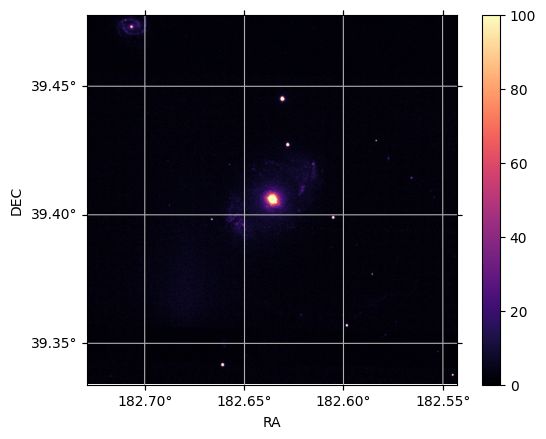

In [ ]:
image_data = sdss_image_file[0].data

ax = plt.subplot(projection = sdss_wcs)

lon = ax.coords[0]
lat = ax.coords[1]
'''

print(np.nanmax(image_data))
print(np.nanmin(image_data))
print(np.nanmean(image_data))
print(np.nanmedian(image_data))

print(np.nanstd(image_data))
'''
plt.imshow(image_data, vmin = 0, vmax=100, cmap = cm.magma)
plt.colorbar()
lat.set_major_formatter('d.dd')
lon.set_major_formatter('d.dd')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.grid(True)
plt.show()

Plot it one more time, but this time also plot where there are bright X-rays

- Use ax.scatter(ra_values, dec_values, transform=ax.get_transform('icrs')) to make a marker where the bright X-rays are

Where are the bright X-rays in relation to the object seen in the optical image?

NGC 4151 is a Seyfert galaxy, google what a Seyfert galaxy is and see if you can make sense of why the X-rays are where they are and why the optical photons are more spread out